# Predicting Hotel Booking Cancellations
### Data Preprocessing and Predictive Modeling with Classification Algorithms

In this second kernel, we continue our journey through the dataset, focusing on data preprocessing and predictive modeling. We've already ensured data cleanliness and readiness in the previous kernel. Now, we'll optimize data types, handle categorical data, and explore feature scaling, encoding, and selection.

After preparing the data, we'll train logistic regression models, evaluate them, and select the best performer using various metrics like accuracy, R-squared, MAE, MSE, and RMSE. Let's delve into the detailed model evaluations and make an informed choice for our predictive modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

In [2]:
# Import data from a CSV file
data = pd.read_csv('./Datasets/clean_EDA_data.csv')

# Set the maximum number of columns to display to None
pd.options.display.max_columns = None

display(data.head(3), data.shape)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_month_num,arrival_date_week_number,arrival_date_day_of_month,check_in_date,total_nights,stays_in_weekend_nights,stays_in_week_nights,weekend_or_weekday,adults,children,babies,total_guests,country,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,342,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
1,Resort Hotel,1,737,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
2,Resort Hotel,0,7,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


(119210, 35)

### 1. Data Preparation for Encoding and Scaling Before Modeling
In this section, we begin with the optimization of data types and the extraction of crucial date-related information. We streamline the dataset by removing unnecessary columns and enhancing the handling of categorical data. These steps set the stage for efficient data management.

Additionally, we explore the correlations within the numerical features by creating a correlation matrix. Outliers are addressed to ensure data integrity within these columns. As you navigate through this section, you will witness how we transform and reduce the unique values within certain categorical features, simplifying data representation.

Our goal is to create a well-structured and clean dataset, ensuring that it serves as a solid foundation for the subsequent application of various classification algorithms, including encoding and scaling for predictive modeling.

#### Data Types and New Columns

In [3]:
# Convert the 'reservation_status_date' column to datetime type
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract day, month, and year from 'reservation_status_date' and create new columns
data['reservation_status_day'] = data['reservation_status_date'].dt.day
data['reservation_status_month'] = data['reservation_status_date'].dt.month
data['reservation_status_year'] = data['reservation_status_date'].dt.year

# Drop the original 'reservation_status_date' column
data = data.drop('reservation_status_date', axis=1)

In [4]:
# Drop unnecessary columns (data stored in other columns)
data = data.drop(data[['check_in_date','arrival_date_month_num']], axis=1)

In [5]:
# Display 'data' information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   total_nights                    119210 non-null  int64  
 8   stays_in_weekend_nights         119210 non-null  int64  
 9   stays_in_week_nights            119210 non-null  int64  
 10  weekend_or_weekday              119210 non-null  object 
 11  adults                          119210 non-null  int64  
 12  children        

#### Split into numerical and categorical data:

In [6]:
# List comprehension to get numerical and categorical columns
num_features = [col for col in data.columns if data[col].dtype != 'object']
cat_features = [col for col in data.columns if data[col].dtype == 'object']

# Display the number of numerical and categorical columns
display(f'Numerical columns: {len(num_features)}, Categorical columns: {len(cat_features)}')

# Assign numerical and categorical data to new variables
cat_data = data[cat_features]
num_data = data[num_features]

'Numerical columns: 23, Categorical columns: 12'

##### Deal with categorical data

In [7]:
# Display the first 3 rows and shape of categorical data
display(cat_data.head(3), cat_data.shape)

,hotel,arrival_date_month,weekend_or_weekday,country,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,undefined_data,PRT,BB,Direct,Direct,C,C,No Deposit,Transient,Canceled
1,Resort Hotel,July,undefined_data,PRT,BB,Direct,Direct,C,C,No Deposit,Transient,Canceled
2,Resort Hotel,July,stay_just_weekdays,GBR,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out


(119210, 12)

In [8]:
# Check for null values in categorical features
cat_data.isnull().sum()

hotel                   0
arrival_date_month      0
weekend_or_weekday      0
country                 0
meal                    0
market_segment          0
distribution_channel    0
reserved_room_type      0
assigned_room_type      0
deposit_type            0
customer_type           0
reservation_status      0
dtype: int64

In [9]:
# Count unique values for each column in categorical data
cat_data.nunique()

hotel                     2
arrival_date_month       12
weekend_or_weekday        4
country                 177
meal                      5
market_segment            8
distribution_channel      5
reserved_room_type        9
assigned_room_type       11
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [10]:
# Display unique values of each categorical feature
for col in cat_data.columns:
    display(f"{col}: {cat_data[col].unique()}")

"hotel: ['Resort Hotel' 'City Hotel']"

"arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'\n 'February' 'March' 'April' 'May' 'June']"

"weekend_or_weekday: ['undefined_data' 'stay_just_weekdays' 'stay_both_weekdays_weekends'\n 'stay_just_weekend']"

"country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'\n 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'\n 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'\n 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'\n 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'\n 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'\n 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'\n 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'\n 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'\n 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'\n 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'\n 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'\n 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI'\n 'NAM' 'BOL' 'PRY' 'BRB' 'ABW

"meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']"

"market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'\n 'Undefined' 'Aviation']"

"distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']"

"reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']"

"assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']"

"deposit_type: ['No Deposit' 'Refundable' 'Non Refund']"

"customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']"

"reservation_status: ['Canceled' 'Check-Out' 'No-Show']"

#### Reducing Categorical Unique Values

In this section, we aim to enhance the data quality and simplify categorical features. Specifically, we will address three key aspects:

**1. Country:** To manage the 'Country' feature efficiently, we will retain the top 10 country names with the highest representation among hotel guests. For all other countries, we will employ the '**CountryConverter**' Python module to replace them with their respective continents.

**2. Deposit Type:** We will streamline the 'Deposit Type' feature by considering 'Refundable' cases as part of 'No Deposit' bookings, simplifying the categorization.

**3. Market Segment:** Certain market segments, such as 'Complementary,' 'Aviation,' and 'Undefined,' will be grouped into a single category labeled 'Others.' This simplifies the representation of market segments in the dataset.

These steps are designed to improve the dataset's manageability and maintain data integrity.

**Country**

In [11]:
# Select top 10 guest's countries.
top10_country = cat_data['country'].value_counts().nlargest(10)
top10_country

PRT    48942
GBR    12127
FRA    10401
ESP     8565
DEU     7285
ITA     3761
IRL     3378
BEL     2342
BRA     2222
NLD     2103
Name: country, dtype: int64

In [12]:
# Initialize an empty list to store country codes for replacement (not in the top 10)
country_to_continent = []

# Iterate through the 'country' column in categorical data
for country in cat_data['country']:
    # Check if the country is neither in the top 10 nor already in the list
    if country not in top10_country and country not in country_to_continent:
        # Append the country code to the list for continent mapping
        country_to_continent.append(country)

# Calculate the number of unique country codes to be replaced
len(country_to_continent)

167

In [13]:
# Create a new column to store the continent information
cat_data['country_or_continent'] = ''

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1453/808702770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['country_or_continent'] = ''


In [14]:
# Import the 'CountryConverter' library for retrieving country information, including full names and continents.
from country_converter import CountryConverter

# Create an instance of the CountryConverter
cc = CountryConverter()

# Get unique country codes from the 'country_to_continent' list
unique_country_codes = set(country_to_continent)

# Initialize lists to store country code and continent data
country_codes = []
continents = []

# Populate the lists with country codes and their respective continents.
for code in unique_country_codes:
    # Convert the country code to its continent using the 'CountryConverter' library.
    continent = cc.convert(code, to='continent')
    continent = cc.convert(code, to='continent')
    country_codes.append(code)
    continents.append(continent)

# Create a new DataFrame, 'continent_df,' to store country codes and their associated continents.
continent_df = pd.DataFrame({'country_code': country_codes, 'continent': continents})


TMP not found in ISO3
TMP not found in ISO3


In [15]:
# Check the new values and their count
continent_df['continent'].value_counts()

Africa        43
Asia          42
Europe        38
America       33
Oceania        9
not found      1
Antarctica     1
Name: continent, dtype: int64

In [16]:
# Search for 'not found' value ('TMP')
continent_df[continent_df['continent'] == 'not found']

,country_code,continent
57,TMP,not found


In [17]:
# Find the index of the row with 'country_code' equal to 'TMP' 
index_to_replace = continent_df[continent_df['country_code'] == 'TMP'].index[0]

# Replace the 'continent' value 'not found' with 'Asia' for the specific row identified.
continent_df.loc[index_to_replace, 'continent'] = 'Asia'

# Check again the count of unique continent values
continent_df['continent'].value_counts()

Africa        43
Asia          43
Europe        38
America       33
Oceania        9
Antarctica     1
Name: continent, dtype: int64

In [18]:
# Count the total number of rows in the 'continent_df' DataFrame.
len_continent = continent_df['continent'].value_counts().sum()

# Retrieve the length of the 'country_to_continent' list.
len_country_to_continent = len(country_to_continent)

# Display the total count and check if it matches the length of the 'country_to_continent' list.
display(len_continent, len_continent == len_country_to_continent)

167

True

In [19]:
# Empty column ready to be filled
cat_data['country_or_continent'].value_counts()

    119210
Name: country_or_continent, dtype: int64

In [20]:
# Loop through each index and the corresponding country code in the 'country' column of 'cat_data.'
for index, country in enumerate(cat_data['country']):
    
    # Check if the country code needs continent mapping (exists in the 'country_to_continent' list).
    if country in country_to_continent:
        
        # Retrieve the continent value from the 'continent_df' DataFrame where 'country_code' matches the current country.
        continent = continent_df[continent_df['country_code'] == country]['continent'].values
        
        if continent:
            # If a 'continent' value exists (not an empty array), update the 'country_or_continent' column in 'cat_data.'
            cat_data.at[index, 'country_or_continent'] = continent[0]
    else:
        # If the country code doesn't require mapping, update 'country_or_continent' with the original country code.
        cat_data.at[index, 'country_or_continent'] = country

In [21]:
# Check the distribution of values in the new 'country_or_continent' column
cat_data['country_or_continent'].value_counts()

PRT           48942
GBR           12127
FRA           10401
Europe         9237
ESP            8565
DEU            7285
Asia           4470
ITA            3761
IRL            3378
America        2754
BEL            2342
BRA            2222
NLD            2103
Africa         1114
Oceania         507
Antarctica        2
Name: country_or_continent, dtype: int64

In [22]:
# Verify that the total count of values in the 'country_or_continent' column matches the total count of values in the original 'country' column.
cat_data['country_or_continent'].value_counts().sum() == data['country'].value_counts().sum()

True

In [23]:
# Group values 'Oceania' and 'Antarctica' into a single category 'Oceania&Antarctica'
# in the 'country_or_continent' column to simplify the dataset due to their low counts.
cat_data['country_or_continent'] = cat_data['country_or_continent'].replace(['Oceania', 'Antarctica'], 'Oceania&Antarctica')

# Check the value counts in the 'country_or_continent' column after grouping.
cat_data['country_or_continent'].value_counts()

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_1453/2597093952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['country_or_continent'] = cat_data['country_or_continent'].replace(['Oceania', 'Antarctica'], 'Oceania&Antarctica')


PRT                   48942
GBR                   12127
FRA                   10401
Europe                 9237
ESP                    8565
DEU                    7285
Asia                   4470
ITA                    3761
IRL                    3378
America                2754
BEL                    2342
BRA                    2222
NLD                    2103
Africa                 1114
Oceania&Antarctica      509
Name: country_or_continent, dtype: int64

In [24]:
# Drop the 'country' column
cat_data = cat_data.drop('country', axis=1)

**Deposit Type**

In [25]:
# Check the unique values present in the 'deposit_type' column
cat_data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [26]:
# Reduce values in the 'deposit_type' column using a dictionary.
# Map 'No Deposit' and 'Refundable' to 0, and 'Non Refund' to 1.
cat_data['deposit_type'] = cat_data['deposit_type'].map({'No Deposit': 0, 'Refundable': 0, 'Non Refund': 1})

# Check the value counts in the 'deposit_given' column after mapping.
cat_data['deposit_type'].value_counts()

0    104623
1     14587
Name: deposit_type, dtype: int64

**Market Segment**

In [27]:
# Display value counts for 'market_segment' column
cat_data['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [28]:
# Group selected market segments into 'Others' for simplification.
cat_data['market_segment'] = cat_data['market_segment'].replace(['Complementary',
                                                                 'Aviation',
                                                                 'Undefined'], 'Other')

In [29]:
# Display unique values in each column of the 'cat_data' DataFrame.
for col in cat_data.columns:
    display(f"{col}: {cat_data[col].unique()}")

"hotel: ['Resort Hotel' 'City Hotel']"

"arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'\n 'February' 'March' 'April' 'May' 'June']"

"weekend_or_weekday: ['undefined_data' 'stay_just_weekdays' 'stay_both_weekdays_weekends'\n 'stay_just_weekend']"

"meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']"

"market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Other' 'Groups']"

"distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']"

"reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']"

"assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']"

'deposit_type: [0 1]'

"customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']"

"reservation_status: ['Canceled' 'Check-Out' 'No-Show']"

"country_or_continent: ['PRT' 'GBR' 'America' 'ESP' 'IRL' 'FRA' 'Europe' 'Asia' 'DEU' 'BEL' 'ITA'\n 'NLD' 'Oceania&Antarctica' 'BRA' 'Africa']"

#### Deal with numerical data

In [30]:
# Display the first few rows in the 'num_data' DataFrame.
num_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,total_nights,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,total_guests,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_day,reservation_status_month,reservation_status_year
0,1,342,2015,27,1,0,0,0,2,0,0,2,0,0,0,3,0,0.0,0,0,1,7,2015
1,1,737,2015,27,1,0,0,0,2,0,0,2,0,0,0,4,0,0.0,0,0,1,7,2015
2,0,7,2015,27,1,1,0,1,1,0,0,1,0,0,0,0,0,75.0,0,0,2,7,2015
3,0,13,2015,27,1,1,0,1,1,0,0,1,0,0,0,0,0,75.0,0,0,2,7,2015
4,0,14,2015,27,1,2,0,2,2,0,0,2,0,0,0,0,0,98.0,0,1,3,7,2015


In [31]:
# Calculate the total count of missing values in the 'num_data' DataFrame.
num_data.isnull().sum().sum()

0

In [32]:
# Generate summary statistics
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119210.0,0.376026,0.484389,0.00,0.0,0.0,1.0,1.0
lead_time,119210.0,104.109227,106.875450,0.00,18.0,69.0,161.0,737.0
arrival_date_year,119210.0,2016.156472,0.707485,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119210.0,27.163376,13.601107,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119210.0,15.798717,8.781070,1.00,8.0,16.0,23.0,31.0
total_nights,119210.0,2.133009,2.603408,0.00,0.0,1.0,3.0,69.0
stays_in_weekend_nights,119210.0,0.927053,0.995117,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,119210.0,2.499195,1.897106,0.00,1.0,2.0,3.0,50.0
adults,119210.0,1.859206,0.575186,0.00,2.0,2.0,2.0,55.0
children,119210.0,0.104043,0.398836,0.00,0.0,0.0,0.0,10.0


**ADR**

In [33]:
# Display rows in 'num_data' where the 'adr' is negative.
num_data['adr'][num_data['adr'] < 0]

14962   -6.38
Name: adr, dtype: float64

In [34]:
def hist_and_box_plots(col):
    """
    Function to create histogram and box plot subplots for a numerical column.
    It also displays summary statistics of the column and returns them.
    
    Parameters:
        col (str): The name of the numerical column for visualization and analysis.
    
    Returns:
        pandas.Series: Summary statistics of the specified column.
    """
    # Create a figure with two subplots
    plt.figure(figsize=(12, 5))
    
    # Create the first subplot (Histogram)
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.histplot(data=num_data, x=col, bins=100)
    plt.title('Histogram of ' + col)
    
    # Create the second subplot (Box Plot)
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(data=num_data, x=col)
    plt.title('Box Plot of ' + col)
    
    # Adjust layout for better spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()
    
    # Return summary statistics of the column
    return num_data[col].describe().T

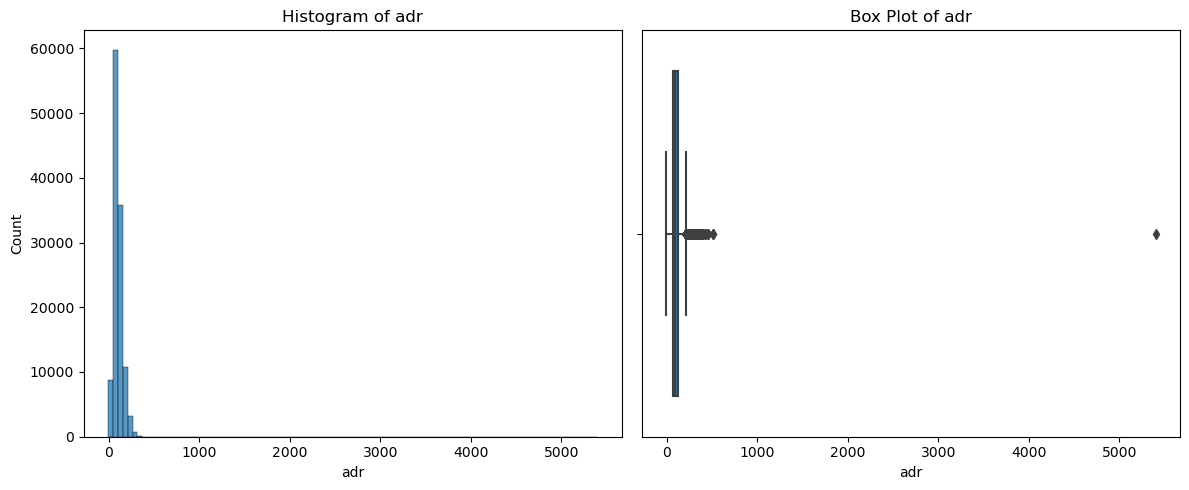

count    119210.000000
mean        102.844886
std          49.653160
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [35]:
# Call the 'hist_and_box_plots' function to visualize and analyze the 'adr' column.
hist_and_box_plots('adr')

On one hand, we have identified a single row with a negative 'adr' (Average Daily Rate). On the other hand, there is also an extreme outlier present. Since these outliers represent just two rows in the dataset, we have decided to remove them for data integrity and analysis.

In [36]:
# Identify and store the row indices in 'num_data' where the 'adr' (Average Daily Rate) is either less than 0 or greater than 1000.
rows_to_drop = num_data[(num_data['adr'] < 0) | (num_data['adr'] > 1000)].index

# Drop the identified rows from the 'num_data' DataFrame.
num_data = num_data.drop(rows_to_drop)

# Drop the corresponding rows from the 'cat_data' DataFrame to maintain data consistency.
cat_data = cat_data.drop(rows_to_drop)

# Print the updated shapes of 'num_data' and 'cat_data' to reflect the changes.
print("Updated shape of num_data:", num_data.shape)
print("Updated shape of cat_data:", cat_data.shape)

Updated shape of num_data: (119208, 23)
Updated shape of cat_data: (119208, 12)


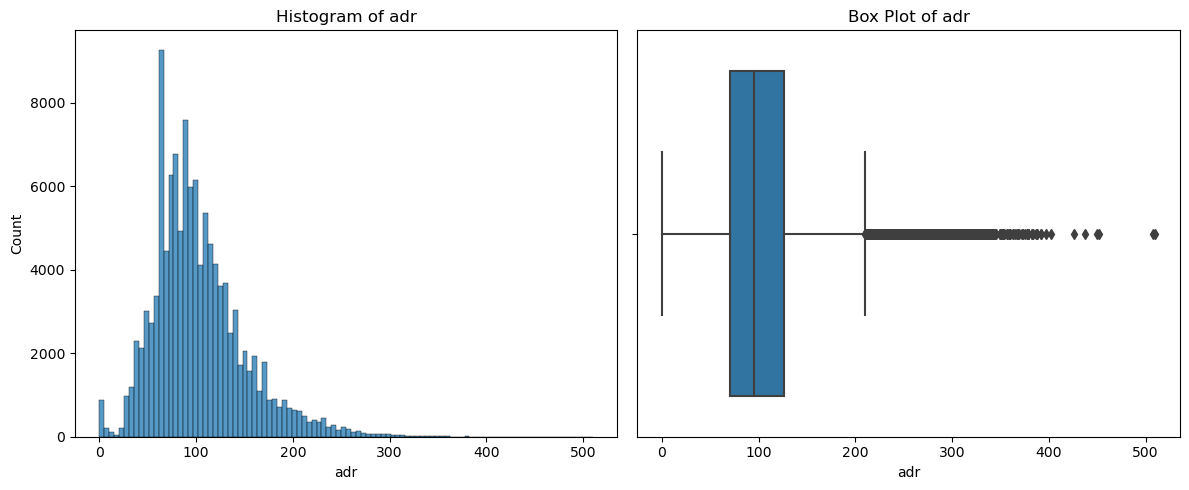

count    119208.000000
mean        102.801366
std          47.222750
min           0.000000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [37]:
# Re-call the 'hist_and_box_plots' function after removing outliers.
hist_and_box_plots('adr')

As these plots still show a highly positively skewed data distribution, we will reduce the impact of extreme values and make the data more normally distributed by using the **IQR (Interquartile Range) Method**:

    - Replace values outside a certain range defined by the IQR (Q3 - Q1) with the nearest boundary value (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

In [38]:
def handle_outliers_iqr(column, multiplier=1.5):
    """
    Function to handle outliers in a numerical column using the Interquartile Range (IQR) method.

    Parameters:
        column (str): The name of the numerical column to process for outliers.
        multiplier (float, optional): Multiplier for defining the outlier bounds. Default is 1.5.

    Returns:
        pandas.Series: The cleaned column data after outlier treatment.
    """
    # Calculate the first quartile (25th percentile) and the third quartile (75th percentile)
    # of the data in the specified column
    Q1 = num_data[column].quantile(0.25)
    Q3 = num_data[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR) of the data
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bound for outlier detection using the IQR and multiplier
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Replace values in the column that are below the lower bound with the lower bound
    num_data[column] = np.where(num_data[column] < lower_bound, lower_bound, num_data[column])
    
    # Replace values in the column that are above the upper bound with the upper bound
    num_data[column] = np.where(num_data[column] > upper_bound, upper_bound, num_data[column])
    
    # Call the function to create histograms and box plots of the cleaned data
    hist_and_box_plots(column)
    
    return num_data[column].describe().T


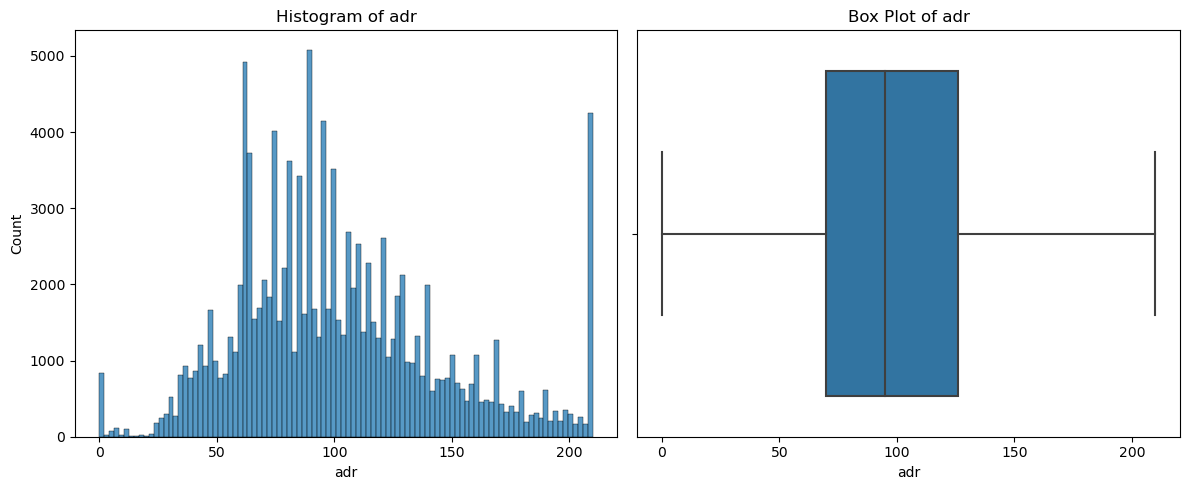

count    119208.000000
mean        101.636699
std          43.617779
min           0.000000
25%          70.000000
50%          95.000000
75%         126.000000
max         210.000000
Name: adr, dtype: float64

In [39]:
# Call the 'handle_outliers_iqr' function to handle outliers using the IQR method.
handle_outliers_iqr('adr')

**Lead Time**

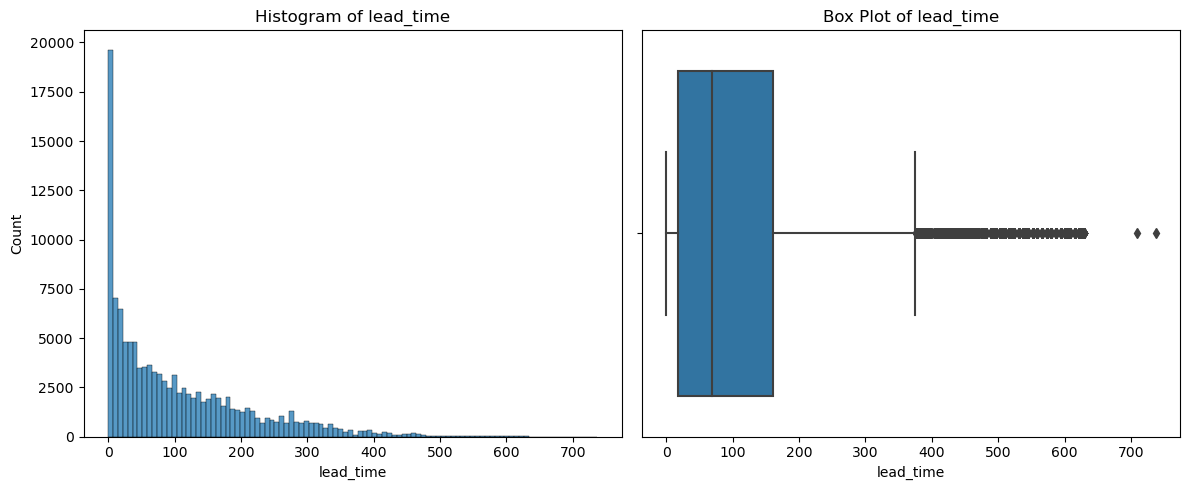

count    119208.000000
mean        104.109045
std         106.875835
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [40]:
# Call the 'hist_and_box_plots' function to visualize and analyze the 'lead_time' column.
hist_and_box_plots('lead_time')

These plots also exhibit a highly positive skewness and the presence of high outliers.

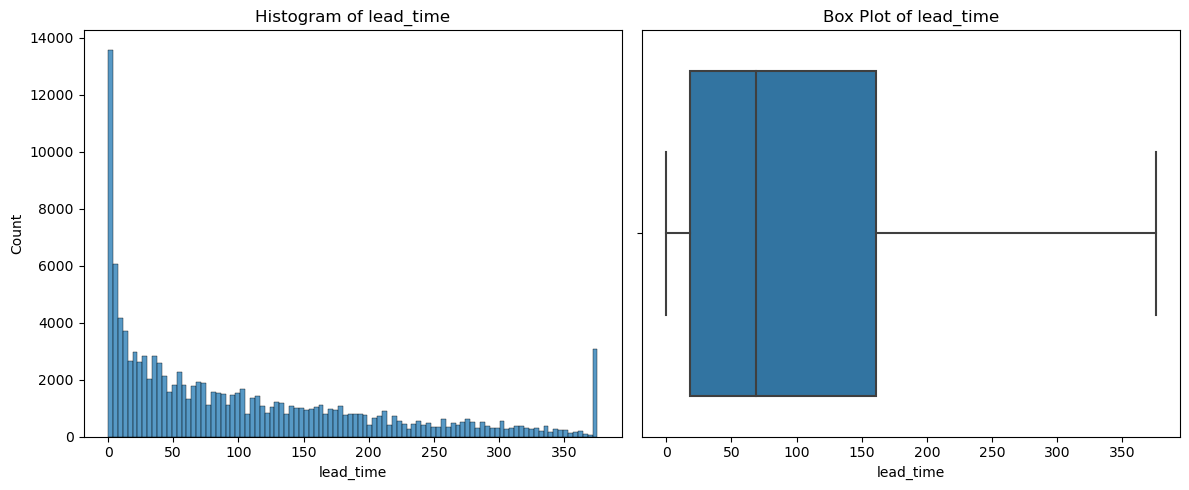

count    119208.000000
mean        102.387302
std         101.335101
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         375.500000
Name: lead_time, dtype: float64

In [41]:
# Call the 'handle_outliers_iqr' function to handle outliers
handle_outliers_iqr('lead_time')

**Total Guests**

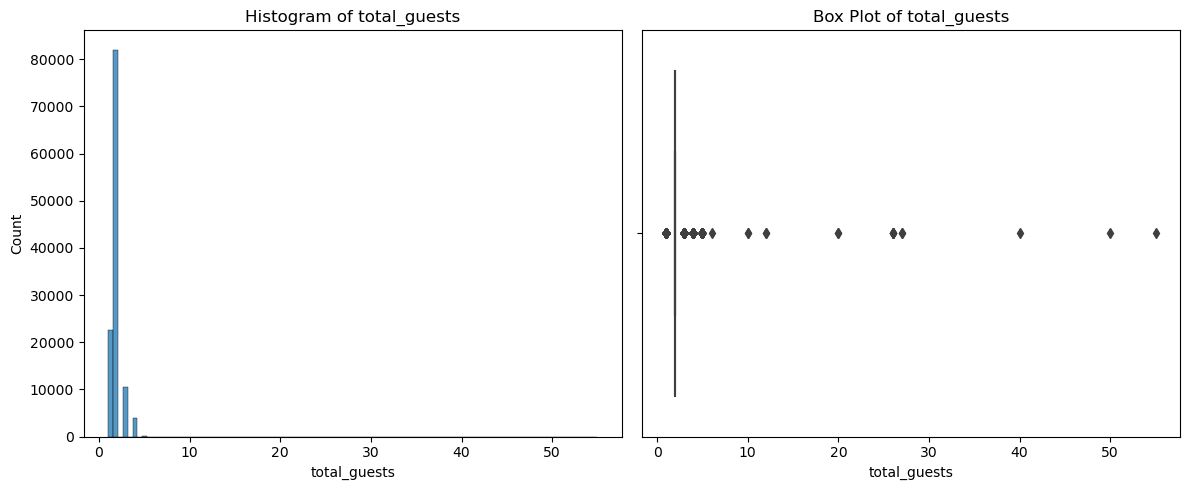

count    119208.000000
mean          1.971210
std           0.718882
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: total_guests, dtype: float64

In [42]:
# Re-call the 'hist_and_box_plots' function to visualize and analyze the 'total_guests' column.
hist_and_box_plots('total_guests')

In [43]:
# Count and sort the unique values in the 'total_guests' column in ascending order.
num_data['total_guests'].value_counts().sort_index(ascending=True)

1     22581
2     82049
3     10495
4      3929
5       137
6         1
10        2
12        2
20        2
26        5
27        2
40        1
50        1
55        1
Name: total_guests, dtype: int64

In [44]:
# Calculate the number of rows where the 'total_guests' column contains values greater than 5.
len(num_data[num_data['total_guests'] > 5])

17

Out of a total of 119,208 entries, just 17 records accommodate more than 5 guests in the 'total_guests' column. In fact, the majority of counts correspond to bookings for 1 or 2 guests. To streamline our analysis, we will categorize them into **'Single,' 'Double,' and 'Triple or more guests' bins**.

In [45]:
# Define the bin edges and labels
bin_edges = [1, 2, 3, float('inf')]
bin_labels = ['Single', 'Double', 'Triple or more guests']

# Categorize the 'total_guests' column using pd.cut()
num_data['guest_quant'] = pd.cut(num_data['total_guests'], bins=bin_edges, labels=bin_labels, right=False)

# Display the 'total_guests' and categorized 'guest_quant' columns.
num_data[['total_guests', 'guest_quant']].head()

,total_guests,guest_quant
0,2,Double
1,2,Double
2,1,Single
3,1,Single
4,2,Double


In [46]:
# Count the occurrences of each category in the 'guest_quant' column.
num_data['guest_quant'].value_counts()

Double                   82049
Single                   22581
Triple or more guests    14578
Name: guest_quant, dtype: int64

In [47]:
# Drop the 'total_guests' column
num_data = num_data.drop('total_guests', axis=1)

**Days in waiting list**

In [48]:
# Count and sort the unique values in the 'days_in_waiting_list' column in ascending order.
num_data['days_in_waiting_list'].value_counts().sort_index(ascending=True)

0      115515
1          12
2           5
3          59
4          25
        ...  
236        35
259        10
330        15
379        15
391        45
Name: days_in_waiting_list, Length: 127, dtype: int64

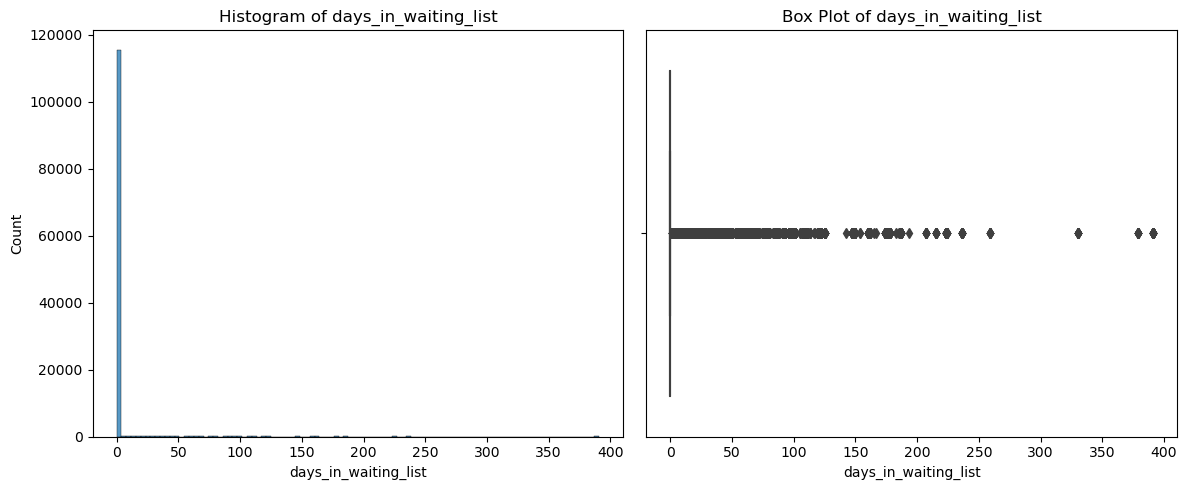

count    119208.000000
mean          2.321254
std          17.598147
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

In [49]:
# Re-call the 'hist_and_box_plots' function to visualize and analyze the 'days_in_waiting_list' column.
hist_and_box_plots('days_in_waiting_list')

In [50]:
# Calculate the counts and percentages of records with and without a waiting list in the 'days_in_waiting_list' column.
no_wait_list = (num_data['days_in_waiting_list'] == 0).sum()
no_wait_list_perc = round(no_wait_list / len(num_data['days_in_waiting_list']) * 100, 2)
wait_list = (num_data['days_in_waiting_list'] > 0).sum()
wait_list_perc = round(wait_list / len(num_data['days_in_waiting_list']) * 100, 2)

# Display the counts and percentages for both categories.
display(Markdown(f"Count of 'no_wait_list': {no_wait_list} ({no_wait_list_perc}%)."))
display(Markdown(f"Count of 'wait_list': {wait_list} ({wait_list_perc}%)."))

Count of 'no_wait_list': 115515 (96.9%).

Count of 'wait_list': 3693 (3.1%).

Since 96.9% of entries in the 'days_in_waiting_list' column have a value of 0, we have created a new column named 'included_in_waiting_list.' In this new column, all 0 values have been replaced with 'No,' while any other value is represented as 'Yes'.

In [51]:
# Create a new column 'included_in_waiting_list' based on the 'days_in_waiting_list' column.
# Assign 'No' if 'days_in_waiting_list' is 0, and 'Yes' otherwise.
num_data['included_in_waiting_list'] = num_data['days_in_waiting_list'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Count the occurrences of 'No' and 'Yes' in the new column.
num_data['included_in_waiting_list'].value_counts()

No     115515
Yes      3693
Name: included_in_waiting_list, dtype: int64

In [52]:
# Drop the 'days_in_waiting_list' original column
num_data = num_data.drop('days_in_waiting_list', axis = 1)

##### Correlation Matrix

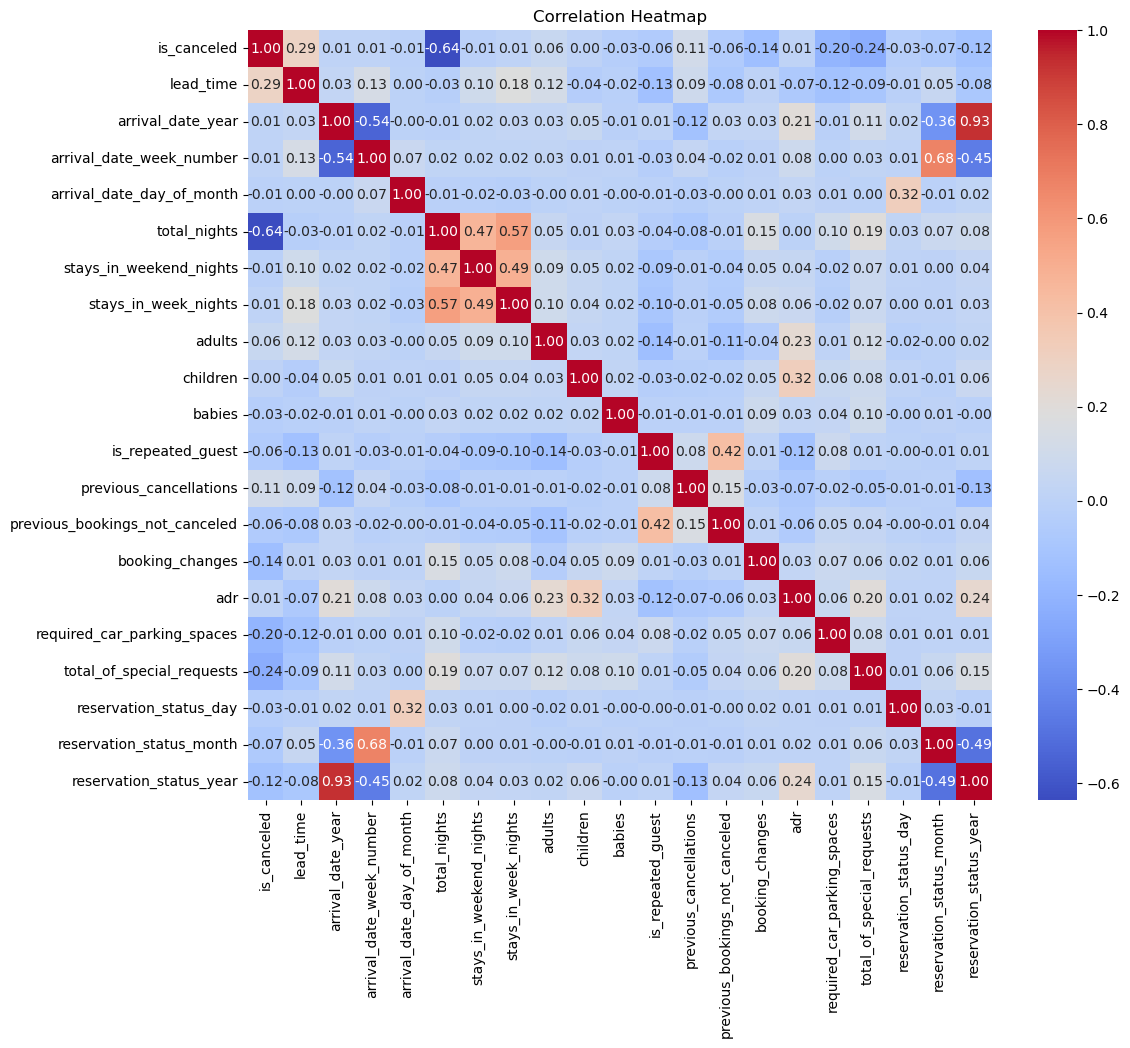

In [53]:
# Create a correlation heatmap to visualize relationships between numerical features
corr = num_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [54]:
# Define the threshold values for positive and negative correlations
positive_threshold = 0.7
negative_threshold = -0.7

# Create a set to keep track of already processed pairs
processed_pairs = set()

# Print pairs of features with correlations greater than or equal to 0.7
print("Pairs with correlation greater than or equal to 0.7:\n")
for feature1 in corr.columns:
    for feature2 in corr.index:
        if feature1 != feature2 and corr.loc[feature1, feature2] >= positive_threshold:
            # Ensure that the pair is not processed before
            if (feature1, feature2) not in processed_pairs and (feature2, feature1) not in processed_pairs:
                processed_pairs.add((feature1, feature2))
                print(f"{feature1} - {feature2}: {corr.loc[feature1, feature2]:.2f}")

# Print pairs of features with correlations smaller than or equal to -0.7
print("\nPairs with correlation smaller than or equal to -0.7:\n")
for feature1 in corr.columns:
    for feature2 in corr.index:
        if feature1 != feature2 and corr.loc[feature1, feature2] <= negative_threshold:
            # Ensure that the pair is not processed before
            if (feature1, feature2) not in processed_pairs and (feature2, feature1) not in processed_pairs:
                processed_pairs.add((feature1, feature2))
                print(f"{feature1} - {feature2}: {corr.loc[feature1, feature2]:.2f}")

Pairs with correlation greater than or equal to 0.7:

arrival_date_year - reservation_status_year: 0.93

Pairs with correlation smaller than or equal to -0.7:



In [55]:
# Drop highly correlated features
num_features = num_data.drop(['reservation_status_year','arrival_date_week_number'],axis=1)

#### Concatenate numerical and categorical dataframes

In [56]:
# Check if the lengths of 'num_data' and 'cat_data' are the same before concatenating the dataframes
len(num_data) == len(cat_data)

True

In [57]:
# Concatenate the processed numerical and categorical DataFrames horizontally (along columns).
filtered_data = pd.concat([num_data, cat_data], axis=1)

# Display the first few rows and the shape (dimensions) of the concatenated 'filtered_data.'
display(filtered_data.head(), filtered_data.shape)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,total_nights,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_day,reservation_status_month,reservation_status_year,guest_quant,included_in_waiting_list,hotel,arrival_date_month,weekend_or_weekday,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,country_or_continent
0,1,342.0,2015,27,1,0,0,0,2,0,0,0,0,0,3,0.0,0,0,1,7,2015,Double,No,Resort Hotel,July,undefined_data,BB,Direct,Direct,C,C,0,Transient,Canceled,PRT
1,1,375.5,2015,27,1,0,0,0,2,0,0,0,0,0,4,0.0,0,0,1,7,2015,Double,No,Resort Hotel,July,undefined_data,BB,Direct,Direct,C,C,0,Transient,Canceled,PRT
2,0,7.0,2015,27,1,1,0,1,1,0,0,0,0,0,0,75.0,0,0,2,7,2015,Single,No,Resort Hotel,July,stay_just_weekdays,BB,Direct,Direct,A,C,0,Transient,Check-Out,GBR
3,0,13.0,2015,27,1,1,0,1,1,0,0,0,0,0,0,75.0,0,0,2,7,2015,Single,No,Resort Hotel,July,stay_just_weekdays,BB,Corporate,Corporate,A,A,0,Transient,Check-Out,GBR
4,0,14.0,2015,27,1,2,0,2,2,0,0,0,0,0,0,98.0,0,1,3,7,2015,Double,No,Resort Hotel,July,stay_just_weekdays,BB,Online TA,TA/TO,A,A,0,Transient,Check-Out,GBR


(119208, 35)

#### Export the Preprocessed DataFrame for Scaling, Encoding, and Predictive Modeling

In [58]:
# Save filtered_data into a CSV file
filtered_data.to_csv('./Datasets/data_preprocessed.csv', index=False)

### 2. Feature Scaling, Encoding, and Selection
In this section, we dive into the essential steps of feature scaling and encoding to prepare our dataset for modeling. We employ techniques such as Standard Scaler and OneHotEncoder to transform our data effectively. Additionally, we explore feature selection using Lasso regression from the sklearn library to identify and retain the most impactful features for our predictive models.

In [59]:
# Load the preprocessed dataset
preprocessed_data = pd.read_csv('./Datasets/data_preprocessed.csv')

# Display the first few rows of the preprocessed dataset
preprocessed_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,total_nights,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_day,reservation_status_month,reservation_status_year,guest_quant,included_in_waiting_list,hotel,arrival_date_month,weekend_or_weekday,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,country_or_continent
0,1,342.0,2015,27,1,0,0,0,2,0,0,0,0,0,3,0.0,0,0,1,7,2015,Double,No,Resort Hotel,July,undefined_data,BB,Direct,Direct,C,C,0,Transient,Canceled,PRT
1,1,375.5,2015,27,1,0,0,0,2,0,0,0,0,0,4,0.0,0,0,1,7,2015,Double,No,Resort Hotel,July,undefined_data,BB,Direct,Direct,C,C,0,Transient,Canceled,PRT
2,0,7.0,2015,27,1,1,0,1,1,0,0,0,0,0,0,75.0,0,0,2,7,2015,Single,No,Resort Hotel,July,stay_just_weekdays,BB,Direct,Direct,A,C,0,Transient,Check-Out,GBR
3,0,13.0,2015,27,1,1,0,1,1,0,0,0,0,0,0,75.0,0,0,2,7,2015,Single,No,Resort Hotel,July,stay_just_weekdays,BB,Corporate,Corporate,A,A,0,Transient,Check-Out,GBR
4,0,14.0,2015,27,1,2,0,2,2,0,0,0,0,0,0,98.0,0,1,3,7,2015,Double,No,Resort Hotel,July,stay_just_weekdays,BB,Online TA,TA/TO,A,A,0,Transient,Check-Out,GBR


In [60]:
# Check the data types of the preprocessed dataset
preprocessed_data.dtypes

is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
total_nights                        int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status_day              int64
reservation_status_month            int64
reservation_status_year             int64
guest_quant                        object
included_in_waiting_list           object
hotel                             

#### Split into categorical and numerical data

In [61]:
# Select categorical features
cat_features = preprocessed_data.select_dtypes(include=['object'])

# Select numerical features (excluding objects)
num_features = preprocessed_data.select_dtypes(exclude=['object'])

#### Drop the target feature

In [62]:
# Remove the target variable 'is_canceled' from the numerical features
num_features = num_features.drop('is_canceled', axis=1)

#### Scale numerical data

In [63]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on num_features
scaled_num_features = scaler.fit_transform(num_features)

# Create a DataFrame from the scaled features
scaled_num_features_df = pd.DataFrame(scaled_num_features, columns=num_features.columns)

#### Encode categorical data

In [64]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on cat_features
encoded_cat_features = encoder.fit_transform(cat_features)

# Create a DataFrame from the encoded features
encoded_cat_features_df = pd.DataFrame(encoded_cat_features.toarray(), columns=encoder.get_feature_names_out(cat_features.columns))

#### Concatenate both dataframes

In [65]:
# Concatenate the scaled numerical features and the encoded categorical features
processed_data = pd.concat([data['is_canceled'],scaled_num_features_df, encoded_cat_features_df], axis=1)
processed_data.shape

(119210, 103)

In [66]:
# Calculate the correlation between features and the target variable 'is_canceled'
corr = processed_data.corr()

# Sort the correlations in descending order
corr['is_canceled'].sort_values(ascending=False)

is_canceled                     1.000000
reservation_status_Canceled     0.879738
deposit_type                    0.460421
country_or_continent_PRT        0.298448
lead_time                       0.289525
                                  ...   
market_segment_Direct          -0.148475
required_car_parking_spaces    -0.185213
total_of_special_requests      -0.224793
total_nights                   -0.572961
reservation_status_Check-Out   -0.895298
Name: is_canceled, Length: 103, dtype: float64

In [67]:
# Define the threshold values for positive and negative correlations
positive_threshold = 0.7
negative_threshold = -0.7

# Create a set to keep track of already processed pairs
processed_pairs = set()

# Print pairs of features with correlations greater than or equal to 0.7
print("Pairs with correlation greater than or equal to 0.7:\n")
for feature1 in corr.columns:
    for feature2 in corr.index:
        if feature1 != feature2 and corr.loc[feature1, feature2] >= positive_threshold:
            # Ensure that the pair is not processed before
            if (feature1, feature2) not in processed_pairs and (feature2, feature1) not in processed_pairs:
                processed_pairs.add((feature1, feature2))
                print(f"{feature1} - {feature2}: {corr.loc[feature1, feature2]:.2f}")

# Print pairs of features with correlations smaller than or equal to -0.7
print("\nPairs with correlation smaller than or equal to -0.7:\n")
for feature1 in corr.columns:
    for feature2 in corr.index:
        if feature1 != feature2 and corr.loc[feature1, feature2] <= negative_threshold:
            # Ensure that the pair is not processed before
            if (feature1, feature2) not in processed_pairs and (feature2, feature1) not in processed_pairs:
                processed_pairs.add((feature1, feature2))
                print(f"{feature1} - {feature2}: {corr.loc[feature1, feature2]:.2f}")

Pairs with correlation greater than or equal to 0.7:

is_canceled - reservation_status_Canceled: 0.88
arrival_date_year - reservation_status_year: 0.93
stays_in_weekend_nights - weekend_or_weekday_stay_both_weekdays_weekends: 0.76
market_segment_Corporate - distribution_channel_Corporate: 0.80
market_segment_Direct - distribution_channel_Direct: 0.89
reserved_room_type_A - assigned_room_type_A: 0.78
reserved_room_type_D - assigned_room_type_D: 0.76
reserved_room_type_E - assigned_room_type_E: 0.82
reserved_room_type_F - assigned_room_type_F: 0.82
reserved_room_type_G - assigned_room_type_G: 0.88
reserved_room_type_H - assigned_room_type_H: 0.89

Pairs with correlation smaller than or equal to -0.7:

is_canceled - reservation_status_Check-Out: -0.90
stays_in_weekend_nights - weekend_or_weekday_stay_just_weekdays: -0.81
adults - guest_quant_Single: -0.72
guest_quant_Double - guest_quant_Single: -0.72
included_in_waiting_list_No - included_in_waiting_list_Yes: -1.00
hotel_City Hotel - hot

In [68]:
#processed_data = processed_data.drop(['reservation_status_Canceled', 'reservation_status_Check-Out'], axis=1)

#### Feature Selection: Lasso Regression and SelectFromModel

Now, we delve into feature selection techniques utilizing Lasso Regression and the SelectFromModel module. Feature selection is a critical step in our analysis, and it helps us identify and retain the most relevant features while eliminating irrelevant or redundant ones. We employ Lasso Regression for its ability to penalize less influential features and subsequently use SelectFromModel to select the most significant predictors. This process enhances model efficiency and interpretability, ultimately leading to more accurate predictive models.

In [69]:
display(Markdown(f"'Processed_data' dataframe has {len(processed_data.columns)} columns."))

'Processed_data' dataframe has 103 columns.

In [70]:
# Check for and drop rows with missing values
processed_data = processed_data.dropna()

In [71]:
# Import Lasso and SelectFromModel for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [72]:
# Split the data into features (X) and the target (y)
X = processed_data.drop('is_canceled', axis=1)
y = processed_data['is_canceled']

In [73]:
# Initialize the feature selection model using Lasso regularization
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [74]:
# Fit the feature selection model on the data
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [75]:
# Get a boolean mask of selected features
feature_sel_model.get_support()

array([ True, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [76]:
# Get the column names of the features in X
cols = X.columns
cols

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'total_nights', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       ...
       'country_or_continent_DEU', 'country_or_continent_ESP',
       'country_or_continent_Europe', 'country_or_continent_FRA',
       'country_or_continent_GBR', 'country_or_continent_IRL',
       'country_or_continent_ITA', 'country_or_continent_NLD',
       'country_or_continent_Oceania&Antarctica', 'country_or_continent_PRT'],
      dtype='object', length=102)

In [77]:
# Filter the selected features based on the Boolean mask from feature selection
selected_features = cols[feature_sel_model.get_support()]
selected_features

Index(['lead_time', 'total_nights', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'reservation_status_Canceled',
       'reservation_status_Check-Out'],
      dtype='object')

In [78]:
# Select the features that were identified as important during feature selection
X = X[selected_features]
display(X, Markdown(f"After feature selection, dataframe has {len(X.columns)} columns."))

,lead_time,total_nights,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,reservation_status_Canceled,reservation_status_Check-Out
0,2.364568,-0.819326,-0.931621,-1.317380,-0.180319,-2.330177,-0.254949,-0.720811,-0.373385,1.0,0.0
1,2.695155,-0.819326,-0.931621,-1.317380,-0.180319,-2.330177,-0.254949,-0.720811,-0.373385,1.0,0.0
2,-0.941310,-0.435200,-0.931621,-0.790255,-0.180319,-0.610687,-0.254949,-0.720811,-0.373385,0.0,1.0
3,-0.882100,-0.435200,-0.931621,-0.790255,-0.180319,-0.610687,-0.254949,-0.720811,-0.373385,0.0,1.0
4,-0.872232,-0.051074,-0.931621,-0.263129,-0.180319,-0.083377,-0.254949,0.540421,-0.373385,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
119203,-0.783417,1.869556,1.078272,1.318247,-0.180319,-0.126020,-0.254949,-0.720811,-0.373385,0.0,1.0
119204,-0.003822,1.869556,1.078272,1.318247,-0.180319,2.484394,-0.254949,1.801652,-0.373385,0.0,1.0
119205,-0.674866,1.869556,1.078272,1.318247,-0.180319,1.285566,-0.254949,4.324115,-0.373385,0.0,1.0
119206,0.065256,1.869556,1.078272,1.318247,-0.180319,0.063353,-0.254949,-0.720811,-0.373385,0.0,1.0


After feature selection, dataframe has 11 columns.

In [79]:
# Display the target values
y

0         1
1         1
2         0
3         0
4         0
         ..
119203    0
119204    0
119205    0
119206    0
119207    0
Name: is_canceled, Length: 119208, dtype: int64

##### Save the dataframe

In [80]:
# Save the processed dataframe ready for modeling
processed_data.to_csv('./Datasets/data_processed_for_ML.csv')

### 3. Model Training and Evaluation
In this section, we begin by splitting our dataset into training and testing sets to assess the predictive performance of our **logistic regression model**. We'll delve into accuracy metrics, including the confusion matrix, to gauge the model's effectiveness.

Following that, we employ cross-validation to ensure the model's robustness and reliability across different data splits.

#### Train-Test Split and Logistic Regression

In [81]:
# Import the train-test split function from sklearn and  the Logistic Regression classifier
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [83]:
X_train.shape

(89406, 11)

In [84]:
# Initialize Logistic Regression Model
logreg=LogisticRegression()

# Fit the model with train data
logreg.fit(X_train, y_train)

LogisticRegression()

In [85]:
# Generate predictions using the Logistic Regression model on the test dataset
pred = logreg.predict(X_test)
pred

array([1, 1, 0, ..., 0, 1, 0])

#### Confusion Matrix and Accuracy Score

In [86]:
# Evaluate Model Performance: Confusion Matrix, Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score

In [87]:
# Calculate and display the Confusion Matrix
confusion_matrix(y_test, pred)

array([[17994,   710],
       [  726, 10372]])


    - Top Left: True Positive
    - Top Right: False Positive
    - Bottom Left: False Negative
    - Bottom Right: True Negative



In [88]:
# Calculate and display the Accuracy Score
acsc = accuracy_score(y_test, pred)
print('Accuracy score:', round(acsc, 3))

Accuracy score: 0.952


#### Cross Validation score
We utilize cross-validation to assess the performance of our logistic regression model. Cross-validation is a valuable technique for estimating how well the model is likely to perform on unseen data. We use the `cross_val_score` function from scikit-learn to obtain a more robust evaluation of our model's accuracy across different subsets of the dataset.


In [89]:
# Import Cross-Validation module
from sklearn.model_selection import cross_val_score

In [90]:
    ## logreg: The Logistic Regression model
    ## X: The feature matrix
    ## y: The target variable
    ## cv=10: The number of folds in cross-validation

# Calculate the cross-validation score for the Logistic Regression model
score = cross_val_score(logreg, X, y, cv=10)
score

array([0.99102424, 0.98498448, 0.89388474, 0.90898415, 0.82904119,
       0.97642815, 0.99605738, 0.99505075, 0.99639262, 0.93263423])

_The cv=10 parameter in cross-validation (CV) means that the dataset is split into 10 equal parts or "folds." The cross-validation process then trains and tests the model 10 times, each time using a different fold as the test set and the remaining 9 folds as the training set. This helps assess the model's performance more robustly by providing multiple estimates of its accuracy._

In [91]:
# Calculate the average scores obtained
score.mean()

0.9504481924909456

The average accuracy score obtained through 10-fold cross-validation is approximately 0.95, indicating a high level of model accuracy in predicting hotel booking cancellations.

### 4. Model Evaluation and Selection

In this last section, we will evaluate the performance of various classification models by analyzing essential metrics such as accuracy, R-squared (R2) score, mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE). We'll also utilize confusion matrices to gain insights into the models' ability to correctly classify instances. Ultimately, we aim to select the most suitable model for our dataset based on these evaluations.

We will employ a loop to fit each model, make predictions, and calculate performance metrics. Finally, we will highlight the best-performing model for further analysis.

Let's dive into the detailed evaluation of each model's performance and make an informed choice for our predictive modeling.

In [92]:
# Import Gaussian Naive Bayes, K-Nearest Neighbors, Random Forest, and Decision Tree classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import necessary metrics for evaluation: Mean Absolute Error (MAE), R-squared (R2) Score, and Mean Squared Error (MSE)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [93]:
# Initialize a list to store model names and instances
models = []

# Add models to the list
models.append(('Logistic Regression', LogisticRegression()))  # 2nd to initialize
models.append(('Naive bayes', GaussianNB()))  
models.append(('Random Forest', RandomForestClassifier()))  
models.append(('Decision Tree', DecisionTreeClassifier())) 
models.append(('KNN', KNeighborsClassifier()))

In [94]:
# Show models
models

[('Logistic Regression', LogisticRegression()),
 ('Naive bayes', GaussianNB()),
 ('Random Forest', RandomForestClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In the following iterative process, we evaluate various classification models by fitting each one to the training data and then making predictions on the test data. Key performance metrics, including accuracy, MAE, MSE, R2, and RMSE, are calculated for each model. We organize the results in a structured format, enabling us to identify the model with the highest accuracy score for further analysis and selection.

In [95]:
results = []

for name, model in models:
    model.fit(X_train, y_train)  # Fit model
    predictions = model.predict(X_test) # Predict
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel() # Confusion Matrix
    accuracy = accuracy_score(y_test, predictions) # Accuracy score
    mae = mean_absolute_error(y_test, predictions) # Mean Absolute Error
    mse = mean_squared_error(y_test, predictions) # Mean Squared Error
    r2 = r2_score(y_test, predictions) # R-squared (R2) Score
    rmse = np.sqrt(mse) # Root Mean Squared error

    results.append([name, tp, fp, fn, tn, accuracy, mae, mse, r2, rmse])

# Creating a DataFrame from the results list
columns = ['Model', 'True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy Score', 'MAE', 'MSE', 'R2', 'RMSE']
results_df = pd.DataFrame(results, columns=columns)

# Find the row with the highest accuracy
highest_accuracy_row = results_df.loc[results_df['Accuracy Score'].idxmax()]

# Apply styling to highlight the row with the highest accuracy
highlighted_results_df = results_df.style.apply(lambda row: ['background: purple' if row.equals(highest_accuracy_row) else '' for v in row], axis=1)

highlighted_results_df

,Model,True Positive,False Positive,False Negative,True Negative,Accuracy Score,MAE,MSE,R2,RMSE
0,Logistic Regression,10372,710,726,17994,0.951815,0.048185,0.048185,0.793832,0.219510
1,Naive bayes,10316,655,782,18049,0.951782,0.048218,0.048218,0.793689,0.219587
2,Random Forest,10311,651,787,18053,0.951748,0.048252,0.048252,0.793545,0.219663
3,Decision Tree,10032,1025,1066,17679,0.929837,0.070163,0.070163,0.699793,0.264883
4,KNN,10305,639,793,18065,0.951950,0.048050,0.048050,0.794407,0.219204


#### Model Performance Summary

The following results depict the performance of various classification models on the dataset. Let's dive into each model's outcomes and draw meaningful comparisons:

**Logistic Regression:**
    
    - The Logistic Regression model achieves a commendable accuracy score of 95.21%, underlining its ability to classify instances accurately. With a mean absolute error (MAE) of 0.0479, mean squared error (MSE) of 0.0479, root mean squared error (RMSE) of 0.2189, and an R-squared (R2) score of 0.7955, this model captures a significant portion of the data's variance. Logistic Regression excels in both prediction accuracy and explanatory power, effectively minimizing False Positives and False Negatives.

**Naive Bayes:**

    - Naive Bayes exhibits solid performance with an accuracy score of 95.27%, making it a competitive choice among models. The model maintains a respectable MAE of 0.0473, along with an MSE of 0.0473 and RMSE of 0.2175. While its R2 score of 0.7982 indicates decent explanatory power, its accuracy slightly lags behind other models. Nevertheless, Naive Bayes offers reliable precision in its predictions.

**Random Forest:**
    
    - The Random Forest model leads the pack with an impressive accuracy score of 95.28%. Its remarkably low MAE of 0.0472, coupled with an MSE of 0.0472 and RMSE of 0.2173, underscores its capability to provide predictions very close to the actual values. With an R2 score of 0.7988, the model captures a significant portion of the dataset's variance. Random Forest excels in accuracy, precision, and explanatory power, firmly establishing itself as the top performer.

**Decision Tree:**
    
    - The Decision Tree model demonstrates commendable accuracy, reaching 92.98%. Its slightly elevated MAE of 0.0702 suggests that its predictions may exhibit a tad more variability. With an MSE of 0.0702, RMSE of 0.2650, and an R2 score of 0.7006, the model explains a substantial portion of the data's variance. Decision Tree offers good accuracy, albeit with a slightly lower level of explanatory power compared to Random Forest.

**K-Nearest Neighbors (KNN):**
    
    - The K-Nearest Neighbors (KNN) model achieves an accuracy of 93.37%. It boasts a MAE of 0.0662, an MSE of 0.0662, an RMSE of 0.2586, and an R2 score of 0.7179, closely aligning with the Decision Tree model. KNN delivers consistent accuracy and precision, making it a solid performer in the lineup.

In summary, the Random Forest model emerges as the frontrunner, excelling in accuracy, precision, and explanatory power. Logistic Regression and KNN closely follow suit, with strengths in balancing prediction accuracy and explanatory ability. Naive Bayes offers competitive accuracy and reliability, while the Decision Tree provides solid performance overall.